In [6]:
import pandas as pd
import numpy as nm 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.shape


(768, 9)

In [9]:
## Total Data Size is 768 rows asd 9 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
### All the data field contains numerical feature 

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [14]:
### plot density plot for all the feature

/tmp/ipykernel_70/2407496923.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


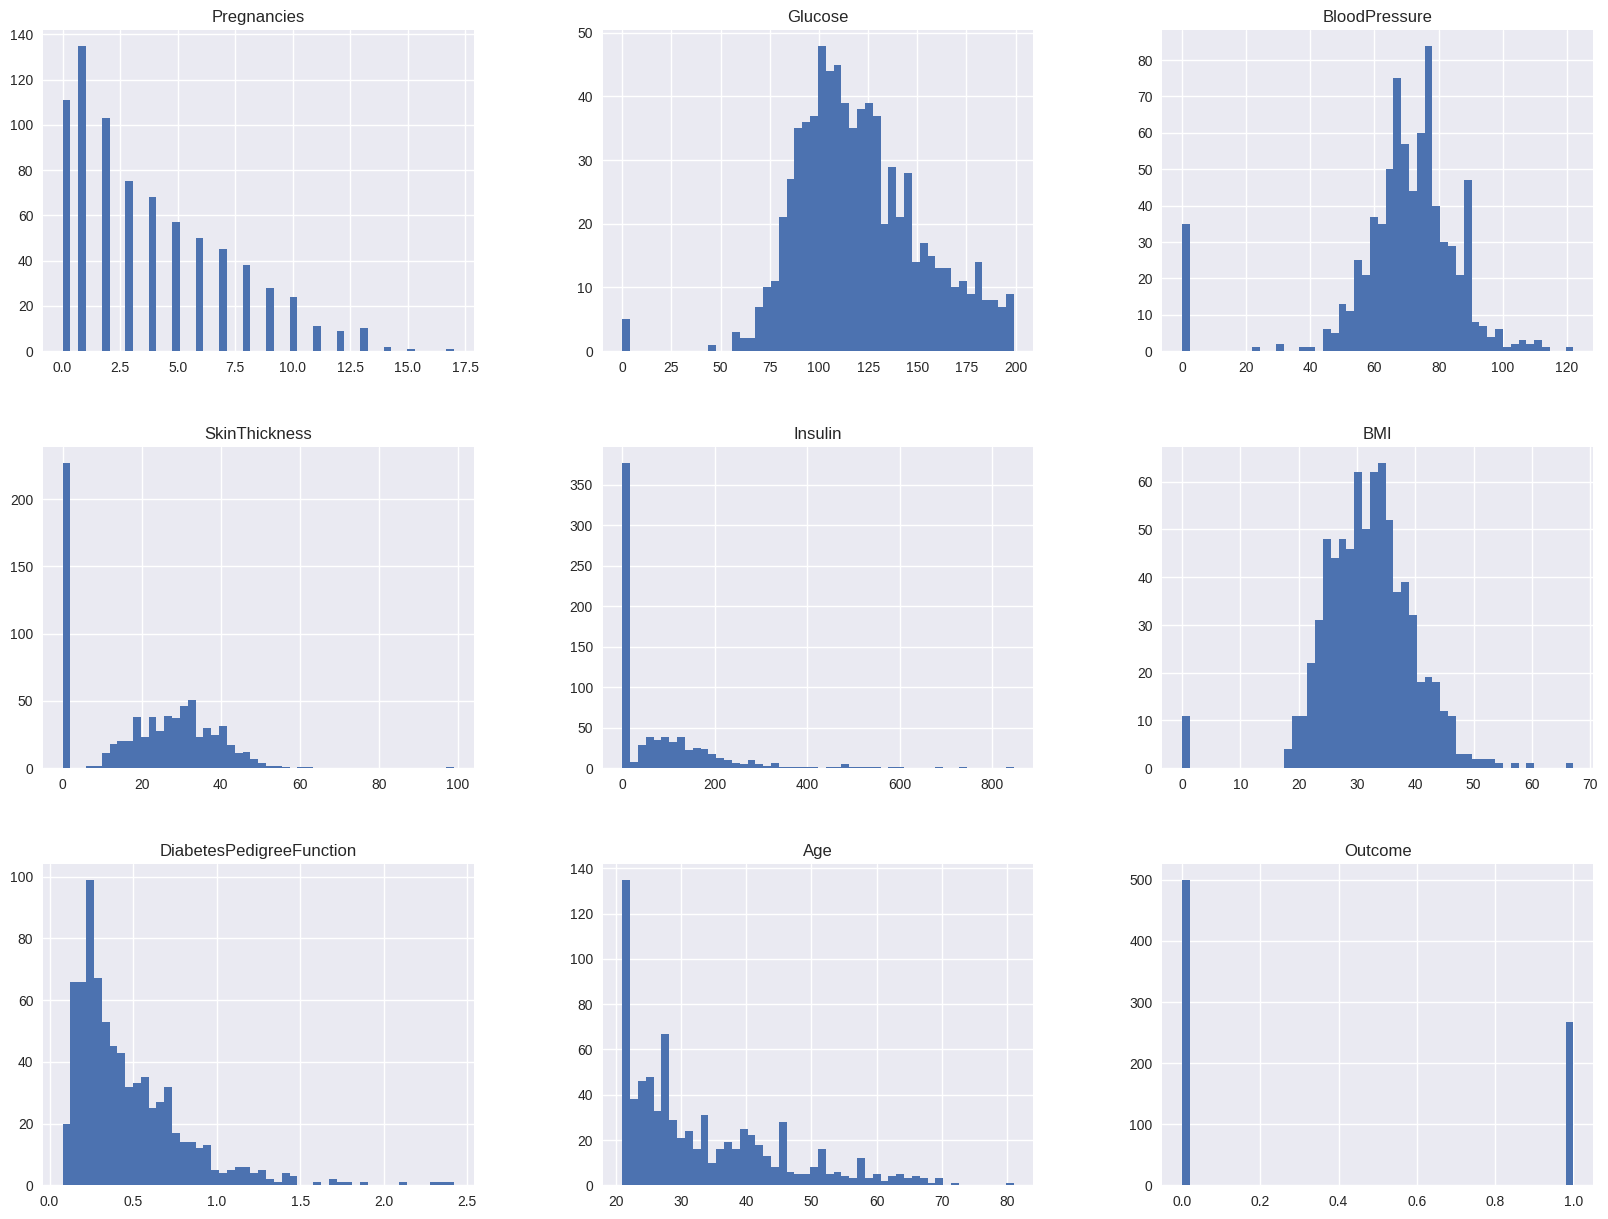

In [32]:
plt.style.use('seaborn')
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [16]:
plt.style.use('seaborn')


/tmp/ipykernel_70/387126562.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


AttributeError: 'DataFrame' object has no attribute 'Sca'

In [33]:
## plotting piechart
percentage = df['Outcome'].value_counts(normalize= True)*100
percentage

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

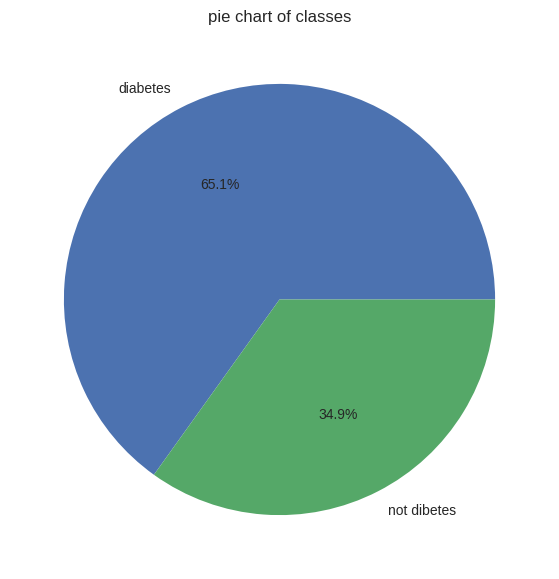

In [34]:
Classlabel = ['diabetes', 'not dibetes']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels = Classlabel, autopct='%1.1f%%')
plt.title('pie chart of classes')
plt.show()

In [35]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

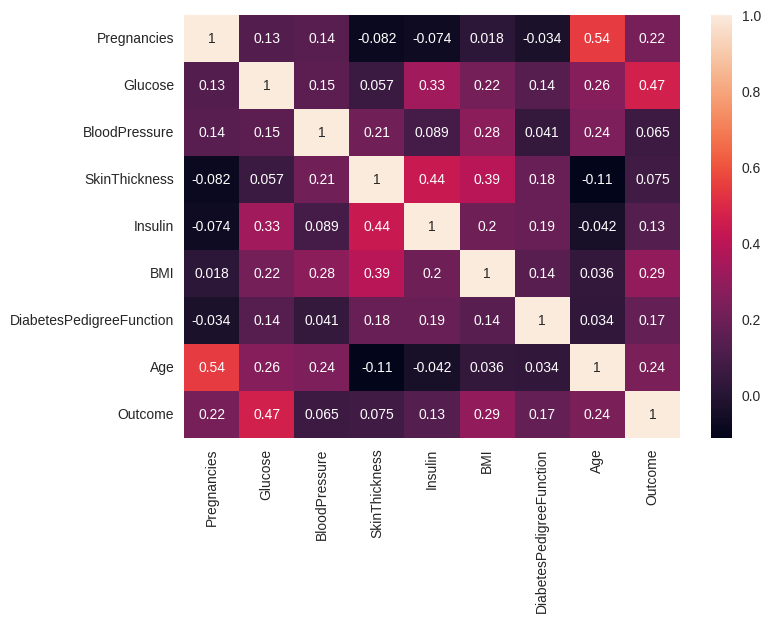

In [36]:
sns.heatmap(df.corr(), annot= True)

<AxesSubplot: >

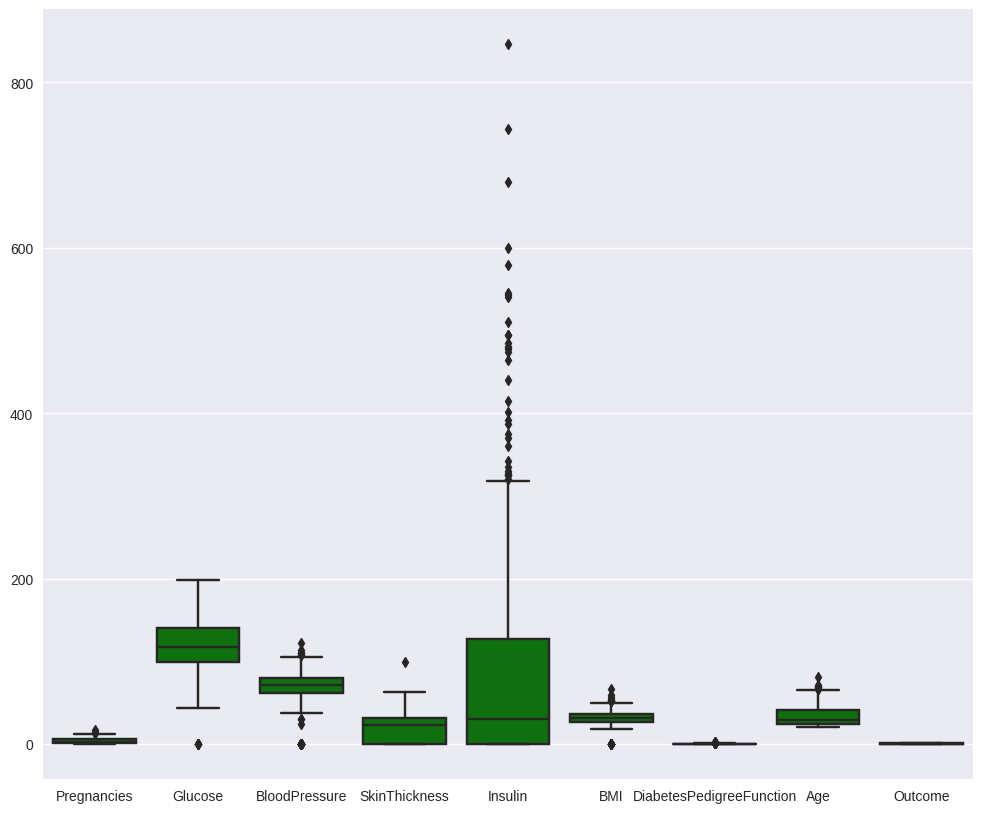

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(df, color= 'green')

In [38]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [39]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [40]:
df_update = df
upper_array = nm.where(df_update['Insulin']>=upper)[0]
lower_array = nm.where(df_update['Insulin']<=lower)[0]


In [41]:
upper_array

array([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
       286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
       612, 645, 655, 695, 707, 710, 715, 753])

In [42]:
lower_array

array([], dtype=int64)

In [43]:
df_update.drop(index=upper_array, inplace=True)
df_update.drop(index=lower_array, inplace=True)

In [44]:
df_update.shape

(734, 9)

In [45]:
df_update.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
X = df_update.iloc[:,:-1]

In [47]:
y = df_update.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [50]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [51]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
y_predict  = classifier.predict(X_test) 

In [74]:
from sklearn.metrics import accuracy_score , classification_report


In [75]:
score = accuracy_score(y_predict, y_test)

In [76]:
score 

0.7065217391304348

In [27]:
from sklearn import tree

[Text(0.46479166666666666, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.914\nsamples = 550\nvalue = [369, 181]'),
 Text(0.19958333333333333, 0.9, 'x[5] <= 26.95\nentropy = 0.688\nsamples = 365\nvalue = [298, 67]'),
 Text(0.05333333333333334, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.19\nsamples = 103\nvalue = [100, 3]'),
 Text(0.02666666666666667, 0.7666666666666667, 'x[0] <= 7.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.013333333333333334, 0.7, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.04, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.08, 0.7666666666666667, 'x[6] <= 0.675\nentropy = 0.084\nsamples = 95\nvalue = [94, 1]'),
 Text(0.06666666666666667, 0.7, 'entropy = 0.0\nsamples = 80\nvalue = [80, 0]'),
 Text(0.09333333333333334, 0.7, 'x[6] <= 0.705\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.08, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10666666666666667, 0.6333333333333333, 'entropy = 0.0

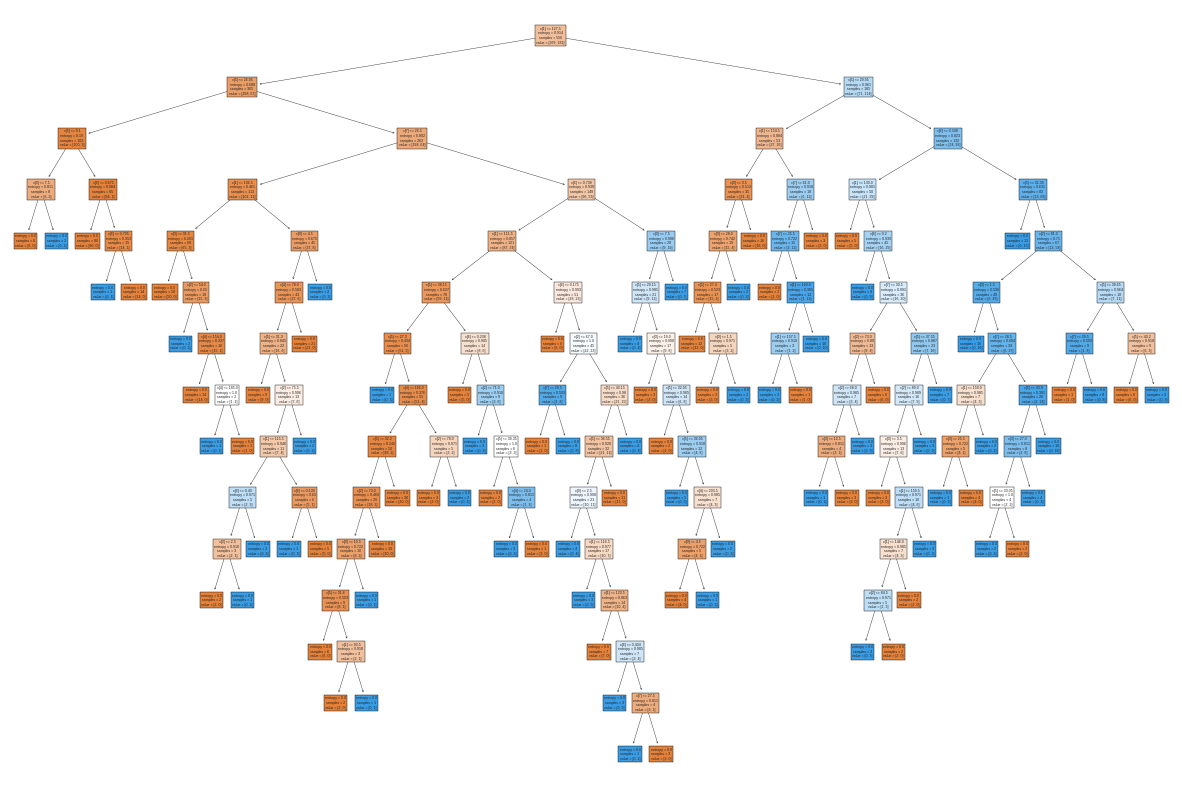

In [61]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

In [62]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [58]:
parameter = {
        'criterion' : ["gini", "entropy", "log_loss"],
        'splitter' : ["best", "random"], 
         'max_depth':[3,4,5,6,7],
        'max_features': ["auto", "sqrt", "log2"]
}

In [59]:
clasi = GridSearchCV(classifier, param_grid=parameter, cv = 5, scoring='accuracy')

In [63]:
clasi.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [64]:
clasi.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [65]:
classifier = DecisionTreeClassifier(criterion='log_loss',max_depth=4,max_features='log2',splitter='best')

In [66]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [69]:
y_predict = classifier.predict(X_test)

In [72]:
score = accuracy_score(y_predict, y_test)
print(score)
print(classification_report(y_predict, y_test))

0.7065217391304348
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       120
           1       0.57      0.61      0.59        64

    accuracy                           0.71       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.71      0.71      0.71       184

